# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.utils import shuffle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples = ", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Max Intensity =", X_train.max())

Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Max Intensity = 255


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

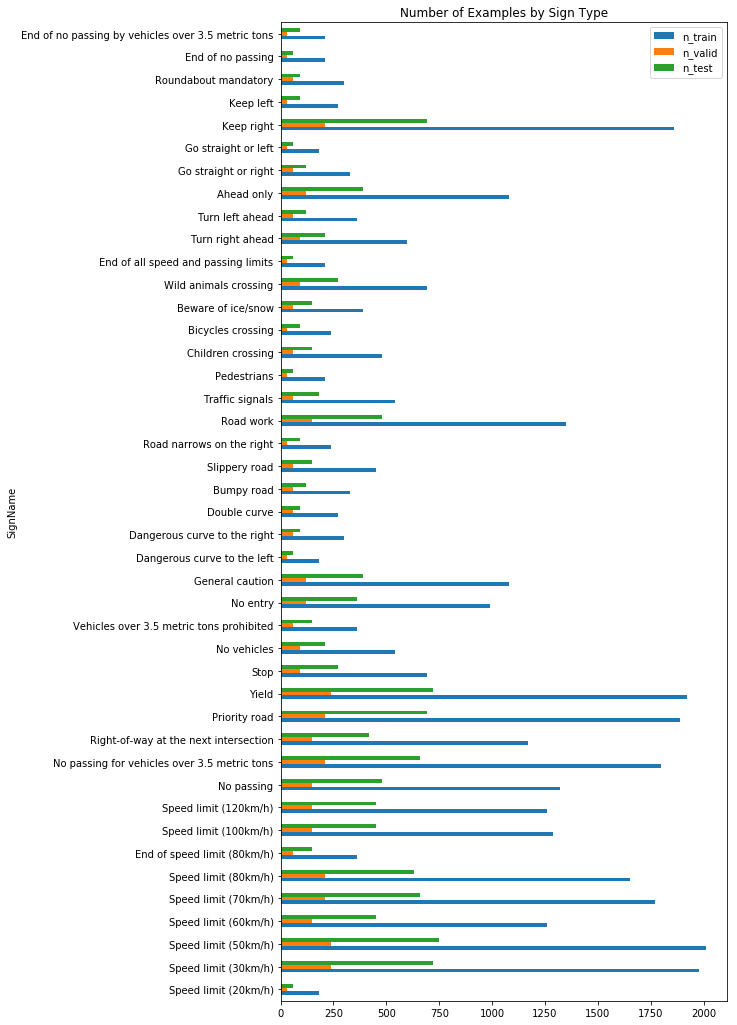

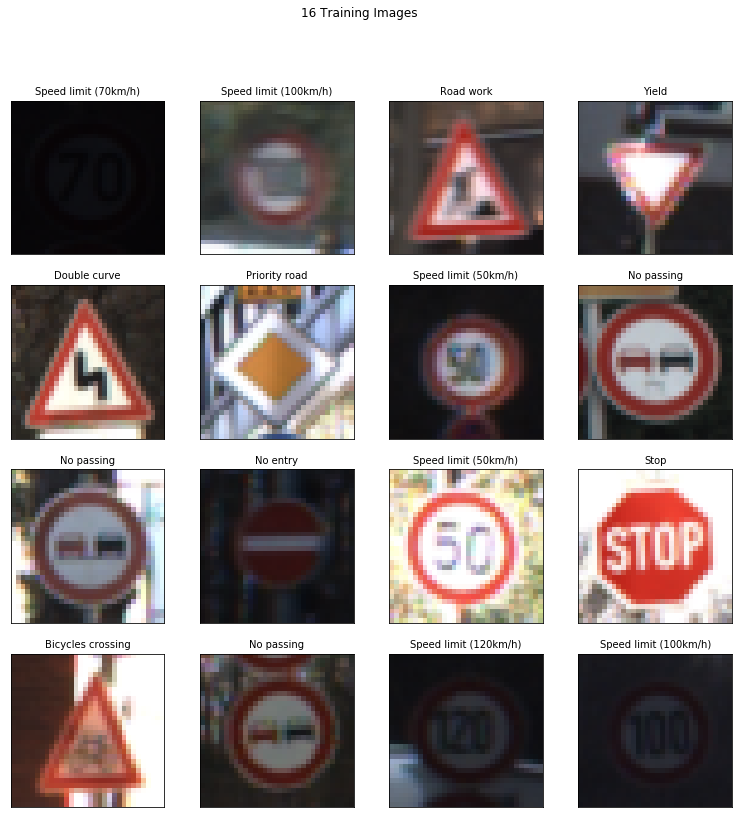

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import pandas as pd
import random
import numpy as np
from textwrap import wrap
import matplotlib.pyplot as plt
import os
# Visualizations will be shown in the notebook.
%matplotlib inline

# Import signnames
df = pd.read_csv('signnames.csv', index_col=0)

# Append counts of each signname in each dataset
df['n_train'] = np.bincount(y_train, minlength=n_classes)
df['n_valid'] = np.bincount(y_valid, minlength=n_classes)
df['n_test'] = np.bincount(y_test, minlength=n_classes)

# Plot numbers of each class in each set
ax = df.plot.barh(x='SignName', y=['n_train','n_valid','n_test'], figsize=(8,18),
                  title="Number of Examples by Sign Type");
plt.gcf().savefig(os.path.join('data_visualizations', 'num_examples_by_sign_type.png'), bbox_inches='tight')

# Plot 16 random training images and their labels
subplot_shape = np.array([4, 4])
indices = random.sample(range(len(X_train)), subplot_shape.prod())

def plot_image_subset(images, indices, subplot_shape, fig=None, figsize=(13,13)):
    """Plot images in a grid"""
    
    if fig is None:
        fig = plt.figure(figsize=figsize)
    
    for i_ax in range(1, np.prod(subplot_shape)+1):
        index = indices[i_ax - 1]
        image = images[index]
        ax = fig.add_subplot(*subplot_shape, i_ax)
        plt.imshow(image.squeeze(), cmap='gray')
        wrapped = '\n'.join(wrap(df.SignName[y_train[index]], 30))
        ax.set_title(wrapped, {'fontsize': 10})
        ax.set_xticks([])
        ax.set_yticks([])
    
    return fig

fig = plot_image_subset(X_train, indices, subplot_shape)
plt.suptitle('16 Training Images')
fig.savefig(os.path.join('data_visualizations', '16_random_training_images.jpg'), bbox_inches='tight')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

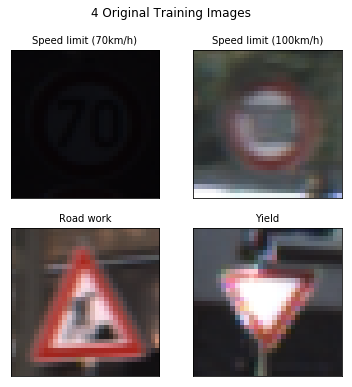

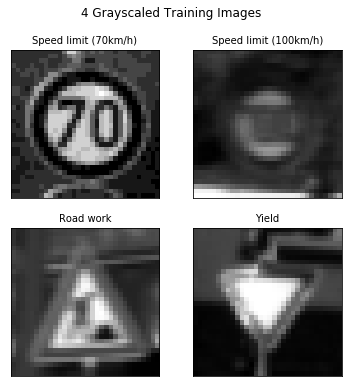

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn import preprocessing
import cv2
from imgaug import augmenters as iaa # image augmentation package from https://github.com/aleju/imgaug

# Grayscaling helper function
def grayscale(image_data):
    """Applies grayscale transform using cv2 module"""
    return np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in image_data])[..., np.newaxis]

# Data Normalizing helper function (with several modes for later experimentation)
def normalize(image_data, mode=None):
    if mode is None:
        return image_data
    elif mode == 'MaxScale':
        return image_data / 255.0
    elif mode == 'MaxScaleMinusMean':
        return image_data / 255.0 - 0.5
    elif mode == 'ImageStandardize':
        """Offsets and scales each image pixel/channel to standard normal distribuution"""
        return np.array([(image - image.mean()) / image.std() for image in image_data])


# Plot example of grayscaling
fig = plot_image_subset(X_train, indices, (2,2), figsize=(6,6))
plt.suptitle('4 Original Training Images')
fig.savefig(os.path.join('data_visualizations', '4_original_training_images.jpg'), bbox_inches='tight')
X_train_gray = grayscale(X_train)
fig = plot_image_subset(X_train_gray, indices, (2,2), figsize=(6,6))
plt.suptitle('4 Grayscaled Training Images')
fig.savefig(os.path.join('data_visualizations', '4_grayscaled_training_images.jpg'), bbox_inches='tight')

### Image Augmentation

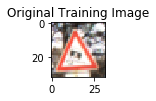

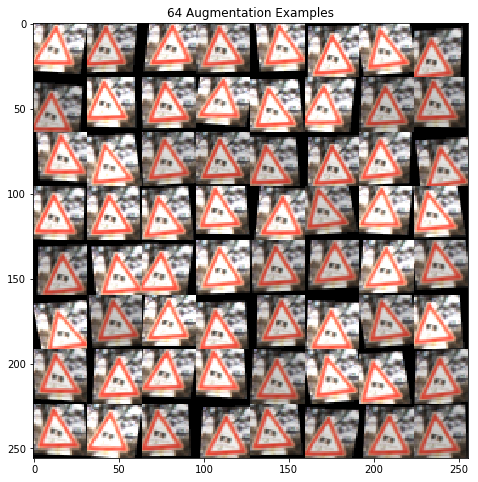

In [5]:
# Image augmentation sequence definition for later use during experiments
# transformations are subtle based on the assumption that the sign detection front-end of a real-world system
# would behave reasonably
seq = iaa.Sequential([
    iaa.Multiply((0.75, 1.25)), # randomly vary brightness from 75% to 125% of the original
    iaa.Affine(translate_px={"x": (-4, 4), "y": (-4, 4)}, # randomly translate +-4 pixels
               rotate=(-5, 5), # randomly rotate +-5 degrees
               shear=(-8, 8)) # randomly shear +-8 degrees
])


# Plot examples of this image augmentation sequence
plt.figure(figsize=(1,1))
plt.imshow(X_train[2034])
plt.title('Original Training Image')
plt.gcf().savefig(os.path.join('data_visualizations', 'original_training_image.jpg'), bbox_inches='tight')
plt.figure(figsize=(8, 8))
plt.imshow(seq.draw_grid(X_train[2034], cols=8, rows=8).astype(np.uint8))
plt.title('64 Augmentation Examples')
plt.gcf().savefig(os.path.join('data_visualizations', '64_augmentation_examples.jpg'), bbox_inches='tight')

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

n_classes = len(np.unique(np.concatenate([y_train, y_valid, y_test])))
print(n_classes)


def conv2d(x, W, b, strides=1, padding='VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return x


def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')


def LeNet(x, inshape, keep_prob_conv, keep_prob_fc, activation=tf.nn.relu):
    
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {'wc1': tf.Variable(tf.truncated_normal((5, 5, inshape[2], 6), mu, sigma)),
               'wc2': tf.Variable(tf.truncated_normal((5, 5, 6, 16), mu, sigma)),
               'wd1': tf.Variable(tf.truncated_normal((5*5*16, 120), mu, sigma)),
               'wd2': tf.Variable(tf.truncated_normal((120, 84), mu, sigma)),
               'out': tf.Variable(tf.truncated_normal((84, n_classes), mu, sigma))}
    biases = {'bc1': tf.Variable(tf.zeros(6)),
              'bc2': tf.Variable(tf.zeros(16)),
              'bd1': tf.Variable(tf.zeros(120)),
              'bd2': tf.Variable(tf.zeros(84)),
              'out': tf.Variable(tf.zeros(n_classes))}
    
    # TODO: Layer 1: Convolutional. Input = inshape. Output = 28x28x6. (assuming 32x32x? inshape)
    # TODO: Activation.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = activation(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob_conv)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    # TODO: Activation.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = activation(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob_conv)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.matmul(fc1, weights['wd1']) + biases['bd1']
    
    # TODO: Activation.
    fc1 = activation(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob_fc)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.matmul(fc1, weights['wd2']) + biases['bd2']
    
    # TODO: Activation.
    fc2 = activation(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob_fc)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    logits = tf.matmul(fc2, weights['out']) + biases['out']
    
    return logits, weights


def LeNetComplexified(x, inshape, keep_prob_conv, keep_prob_fc, activation=tf.nn.relu):
    
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {'wc1': tf.Variable(tf.truncated_normal((5, 5, inshape[2], 32), mu, sigma)),
               'wc2': tf.Variable(tf.truncated_normal((5, 5, 32, 64), mu, sigma)),
               'wc3': tf.Variable(tf.truncated_normal((5, 5, 64, 128), mu, sigma)),
               'wd1': tf.Variable(tf.truncated_normal((14336, 1024), mu, sigma)),
               'wd2': tf.Variable(tf.truncated_normal((1024, 1024), mu, sigma)),
               'out': tf.Variable(tf.truncated_normal((1024, n_classes), mu, sigma))}
    biases = {'bc1': tf.Variable(tf.zeros(32)),
              'bc2': tf.Variable(tf.zeros(64)),
              'bc3': tf.Variable(tf.zeros(128)),
              'bd1': tf.Variable(tf.zeros(1024)),
              'bd2': tf.Variable(tf.zeros(1024)),
              'out': tf.Variable(tf.zeros(n_classes))}
    
    # Layer 1: Convolutional. Input = inshape. Output = 32x32x32. (assuming 32x32x? inshape)
    # Activation.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'], padding='SAME')
    conv1 = activation(conv1)

    # TODO: Pooling. Input = 32x32x32. Output = 16x16x32.
    conv1 = maxpool2d(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob_conv)
    print('conv1 ',conv1.get_shape())

    # TODO: Layer 2: Convolutional. Output = 16x16x64.
    # TODO: Activation.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], padding='SAME')
    conv2 = activation(conv2)

    # TODO: Pooling. Input = 16x16x64. Output = 8x8x64.
    conv2 = maxpool2d(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob_conv)
    print('conv2 ', conv2.get_shape())
    
    # TODO: Layer 3: Convolutional. Output = 8x8x128.
    # TODO: Activation.
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'], padding='SAME')
    conv3 = activation(conv3)

    # TODO: Pooling. Input = 8x8x128. Output = 4x4x128.
    conv3 = maxpool2d(conv3)
    conv3 = tf.nn.dropout(conv3, keep_prob_conv)
    print('conv3 ', conv3.get_shape())

    # TODO: Flatten and concatenate layers 1-3. Output = 16*16*32 + 8*8*64 + 4*4*128 = 14336.
    conv1flat = flatten(conv1)
    print('conv1flat ', conv1flat.get_shape())
    conv2flat = flatten(conv2)
    print('conv2flat ', conv2flat.get_shape())
    conv3flat = flatten(conv3)
    print('conv3flat ', conv3flat.get_shape())
    fc1 = tf.concat_v2([conv1flat, conv2flat, conv3flat], 1)
    
    # TODO: Layer 3: Fully Connected. Input = 14336. Output = 1024.
    fc1 = tf.matmul(fc1, weights['wd1']) + biases['bd1']
    
    # TODO: Activation.
    fc1 = activation(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob_fc)
    print('fc1 ', fc1.get_shape())
    
    
    # TODO: Layer 4: Fully Connected. Input = 1024. Output = 1024.
    fc2 = tf.matmul(fc1, weights['wd2']) + biases['bd2']
    
    # TODO: Activation.
    fc2 = activation(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob_fc)
    print('fc2 ', fc2.get_shape())
    
    # TODO: Layer 5: Fully Connected. Input = 1024. Output = n_classes.
    logits = tf.matmul(fc2, weights['out']) + biases['out']
    print('logits ', logits.get_shape())
    
    return logits, weights


def LeNetMultilevel(x, inshape, keep_prob_conv, keep_prob_fc, activation=tf.nn.relu):
    
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {'wc1': tf.Variable(tf.truncated_normal((5, 5, inshape[2], 6), mu, sigma)),
               'wc2': tf.Variable(tf.truncated_normal((5, 5, 6, 16), mu, sigma)),
               'wd1': tf.Variable(tf.truncated_normal((5*5*16 + 14*14*6, 120), mu, sigma)),
               'wd2': tf.Variable(tf.truncated_normal((120, 84), mu, sigma)),
               'out': tf.Variable(tf.truncated_normal((84, n_classes), mu, sigma))}
    biases = {'bc1': tf.Variable(tf.zeros(6)),
              'bc2': tf.Variable(tf.zeros(16)),
              'bd1': tf.Variable(tf.zeros(120)),
              'bd2': tf.Variable(tf.zeros(84)),
              'out': tf.Variable(tf.zeros(n_classes))}
    
    # TODO: Layer 1: Convolutional. Input = inshape. Output = 28x28x6. (assuming 32x32x? inshape)
    # TODO: Activation.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = activation(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob_conv)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    # TODO: Activation.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = activation(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob_conv)

    # TODO: Flatten and concatenate layers 1 and 2. Output = 14*14*6 + 5*5*16 = 1576
    conv1flat = flatten(conv1)
    print('conv1flat ', conv1flat.get_shape())
    conv2flat = flatten(conv2)
    print('conv2flat ', conv2flat.get_shape())
    fc1 = tf.concat_v2([conv1flat, conv2flat], 1)
    
    # TODO: Layer 3: Fully Connected. Input = 1576. Output = 120.
    fc1 = tf.matmul(fc1, weights['wd1']) + biases['bd1']
    
    # TODO: Activation.
    fc1 = activation(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob_fc)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.matmul(fc1, weights['wd2']) + biases['bd2']
    
    # TODO: Activation.
    fc2 = activation(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob_fc)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    logits = tf.matmul(fc2, weights['out']) + biases['out']
    
    return logits, weights

43


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import time
import pandas as pd
import itertools
from tabulate import tabulate


def train_model(X_train, y_train, X_valid, y_valid,
                max_epochs=100, batch_size=256, rate=0.001,
                n_stop = 5, kp_conv=1.0, kp_fc=1.0, b_conv=0, b_fc=0,
                activation=tf.nn.relu, num_aug=0, architecture=LeNet,
                isgray=False, norm_type='MaxScaleMinusMean',
                save_path='./lenet5', save_model=True):
    
    
    ################### Create Model
    inshape = X_train[0].shape
    
    x = tf.placeholder(tf.float32, (None,) + inshape)
    y = tf.placeholder(tf.int32, (None))
    learning_rate = tf.placeholder(tf.float32, shape=[])
    one_hot_y = tf.one_hot(y, n_classes)
    keep_prob_conv = tf.placeholder(tf.float32)
    keep_prob_fc = tf.placeholder(tf.float32)
    beta_conv = tf.placeholder(tf.float32)
    beta_fc = tf.placeholder(tf.float32)
    
    logits, weights = architecture(x, inshape, keep_prob_conv, keep_prob_fc, activation=activation)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    l2_reg_term_conv = beta_conv*(tf.nn.l2_loss(weights['wc1']) +
                                  tf.nn.l2_loss(weights['wc2']))
    if architecture is LeNetComplexified:
        l2_reg_term_conv += beta_conv*(tf.nn.l2_loss(weights['wc3']))
    l2_reg_term_fc = beta_fc*(tf.nn.l2_loss(weights['wd1']) +
                              tf.nn.l2_loss(weights['wd2']) + 
                              tf.nn.l2_loss(weights['out']))
    loss_operation = tf.reduce_mean(cross_entropy) + l2_reg_term_conv + l2_reg_term_fc
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training_operation = optimizer.minimize(loss_operation)

    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver(max_to_keep=6)

    
    def evaluate(X_data, y_data, batch_size, b_conv, b_fc):
        num_examples = len(X_data)
        total_accuracy = 0
        total_loss = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
            accuracy, loss = sess.run([accuracy_operation, loss_operation,], feed_dict={x: batch_x, y: batch_y,
                                                                                        keep_prob_conv: 1.0,
                                                                                        keep_prob_fc: 1.0,
                                                                                        beta_conv: b_conv,
                                                                                        beta_fc: b_fc})
            total_accuracy += (accuracy * len(batch_x))
            total_loss += (loss * len(batch_x))
        return total_accuracy / num_examples, total_loss / num_examples
    
    
    #def augment(X, y):
    #    X_aug = X
    #    y_aug = y
    #    for i in range(num_aug):
    #        X_aug = np.concatenate([X_aug, seq.augment_images(X)])
    #        y_aug = np.concatenate([y_aug, y])
    #    return X_aug, y_aug


    def preprocess(X):
        if isgray:
            return normalize(grayscale(X), mode=norm_type)
        else:
            return normalize(X, mode=norm_type)
    
    
    best_accy = None
    best_epoch_idx = 0
    best_iter = None
    elapsed_minutes = None
    
    ###################### Train the Model
    train_stats = np.full((max_epochs, 2), np.nan)
    valid_stats = np.full((max_epochs, 2), np.nan)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        start_time = time.time()

        print("Training...")
        print()
        for i in range(max_epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for batch_i, offset in enumerate(range(0, num_examples, batch_size)):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: preprocess(batch_x), y: batch_y, 
                                                        keep_prob_conv: kp_conv, keep_prob_fc: kp_fc,
                                                        beta_conv: b_conv, beta_fc: b_fc,
                                                        learning_rate: rate})
                for aug_i in range(num_aug):
                    batch_x_aug = seq.augment_images(batch_x)
                    sess.run(training_operation, feed_dict={x: preprocess(batch_x_aug), y: batch_y, 
                                                            keep_prob_conv: kp_conv, keep_prob_fc: kp_fc,
                                                            beta_conv: b_conv, beta_fc: b_fc,
                                                            learning_rate: rate})


            train_stats[i, :] = evaluate(preprocess(X_train), y_train, batch_size, b_conv, b_fc)
            valid_stats[i, :] = evaluate(preprocess(X_valid), y_valid, batch_size, b_conv, b_fc)


            print(("EPOCH {}: valid_acc = {:.6f}, valid_loss = {:.6f}, "
                   "train_acc = {:.6f}, train_loss = {:.6f} ...").format(i+1,
                                                                         valid_stats[i, 0], valid_stats[i, 1],
                                                                         train_stats[i, 0], train_stats[i, 1]))
            if save_model:
                this_save_path = saver.save(sess, save_path, global_step=i)
                print("Model saved as", this_save_path)

            if i > (n_stop - 1):
                not_improved = valid_stats[:i-n_stop+1,0].max() > valid_stats[i-n_stop+1:i+1,0].max()
                if not_improved:
                    print("Validation accy hasn't improved for ", n_stop, " epochs. Stopping.")
                    break

        elapsed_minutes = (time.time() - start_time)/60.0
        print('Done. It took {} minutes.'.format(elapsed_minutes))
        if (i - n_stop) >= 0:
            best_epoch_idx = i - n_stop
        else:
            best_epoch_idx = i
        best_accy = valid_stats[best_epoch_idx, 0]
        iters_per_epoch = len(range(0, num_examples, bsize))
        best_iter = (best_epoch_idx + 1)*iters_per_epoch
        print('Best validation accuracy {}, reached after {} epochs, {} iterations.'
              .format(best_accy, best_epoch_idx + 1, best_iter))

            

    def evaluate_wrapper(X_data, y_data):
        return evaluate(X_data, y_data, batch_size=batch_size, b_conv=b_conv, b_fc=b_fc)
    
    
    def softmax(X_data, y_data, k=None):
        out_list = []
        sess = tf.get_default_session()
        if k is None:
            operation = tf.nn.softmax(logits)
        else:
            operation = tf.nn.top_k(tf.nn.softmax(logits), k=k)
        return sess.run(operation, feed_dict={x: X_data, y: y_data,
                                              keep_prob_conv: 1.0,
                                              keep_prob_fc: 1.0,
                                              beta_conv: b_conv,
                                              beta_fc: b_fc})
    
    
    return best_accy, best_epoch_idx + 1, best_iter, elapsed_minutes, \
           (preprocess, evaluate_wrapper, softmax, save_path + '-' + str(best_epoch_idx))



In [8]:
RUN_EXPERIMENT = True

if RUN_EXPERIMENT:

    entries = []
    num_examples = len(X_train)

    act_dict = {'relu': tf.nn.relu,
                'tanh': tf.nn.tanh,
                'sigmoid': tf.nn.sigmoid,
                'elu': tf.nn.elu,
                'relu6': tf.nn.relu6}

    batch_sizes = [256]
    learning_rates = [0.002]#[0.00025, 0.0005, 0.001, 0.002, 0.004, 0.008]
    norm_types = ['MaxScaleMinusMean']#[None,'MaxScale','MaxScaleMinusMean','ImageStandardize']
    act_types = ['tanh'] # act_dict.keys()
    kp_conv_list = [1]
    kp_fc_list = [0.5]
    b_conv_list = [0.001]
    b_fc_list = [0.001]
    reg_params = itertools.product(kp_conv_list, kp_fc_list, b_conv_list, b_fc_list)
    graylist = [False]
    num_aug_list = [0]
    arch_list = [LeNet]#Complexified]
    params = itertools.product(batch_sizes, learning_rates, norm_types, act_types,
                               reg_params, graylist, num_aug_list, arch_list)

    for bsize, lrate, norm_type, act_type, reg_param, isgray, num_aug, arch in params:

        kp_conv, kp_fc, b_conv, b_fc = reg_param

        entry = {'batch_size': 256, 'learn_rate': lrate, 'norm_type': norm_type, 'act_type': act_type,
                 'kp_conv': kp_conv, 'kp_fc': kp_fc, 'b_conv': b_conv, 'b_fc': b_fc, 'isgray': isgray,
                 'num_aug': num_aug, 'arch': arch.__name__}
        print()
        print(entry)
            
        outputs = train_model(X_train, y_train, 
                              X_valid, y_valid,
                              batch_size=256, rate=lrate, activation=act_dict[act_type],
                              kp_conv=kp_conv, kp_fc=kp_fc, b_conv=b_conv, b_fc=b_fc,
                              architecture=arch, isgray=isgray, num_aug=num_aug, norm_type=norm_type)
        entry['best_valid_accy'] = outputs[0]
        entry['best_epoch'] = outputs[1]
        entry['best_iter'] = outputs[2]
        entry['run_time'] = outputs[3]
        entries.append(entry)

    experiment_df = pd.DataFrame(entries)
    print(tabulate(experiment_df, experiment_df.keys(), tablefmt='pipe', showindex=False))
    experiment_df.to_csv('dataframes/final_experiment.csv', index=False)
    preprocess, evaluate, softmax, save_path = outputs[4]
    experiment_df


{'learn_rate': 0.002, 'num_aug': 0, 'arch': 'LeNet', 'act_type': 'tanh', 'isgray': False, 'kp_conv': 1, 'b_fc': 0.001, 'b_conv': 0.001, 'batch_size': 256, 'kp_fc': 0.5, 'norm_type': 'MaxScaleMinusMean'}
Training...

EPOCH 1: valid_acc = 0.735828, valid_loss = 1.160478, train_acc = 0.788126, train_loss = 1.028446 ...
Model saved as ./lenet5-0
EPOCH 2: valid_acc = 0.887075, valid_loss = 0.698452, train_acc = 0.928101, train_loss = 0.573833 ...
Model saved as ./lenet5-1
EPOCH 3: valid_acc = 0.918594, valid_loss = 0.555628, train_acc = 0.954309, train_loss = 0.450807 ...
Model saved as ./lenet5-2
EPOCH 4: valid_acc = 0.930159, valid_loss = 0.510576, train_acc = 0.970603, train_loss = 0.380037 ...
Model saved as ./lenet5-3
EPOCH 5: valid_acc = 0.932653, valid_loss = 0.478641, train_acc = 0.978017, train_loss = 0.343276 ...
Model saved as ./lenet5-4
EPOCH 6: valid_acc = 0.940590, valid_loss = 0.448403, train_acc = 0.983333, train_loss = 0.318000 ...
Model saved as ./lenet5-5
EPOCH 7: valid_

In [9]:
# Best outcome in this table won't exactly match other performance calculations due to random shuffling of data
print("The primary set of previous experimentation results are:")
main_experiments_df = pd.read_csv('dataframes/reg_experiment_df.csv')
print(tabulate(main_experiments_df, main_experiments_df.keys(), tablefmt='pipe', showindex=False))

The primary set of previous experimentation results are:
| act_type   |   b_conv |   b_fc |   batch_size |   best_epoch |   best_iter |   best_valid_accy |   kp_conv |   kp_fc |   learn_rate | norm_type         |   run_time |
|:-----------|---------:|-------:|-------------:|-------------:|------------:|------------------:|----------:|--------:|-------------:|:------------------|-----------:|
| tanh       |    0.001 |  0.001 |          256 |           22 |        2992 |          0.970975 |       1   |     0.5 |        0.002 | MaxScaleMinusMean |   2.09816  |
| tanh       |    0     |  0.001 |          256 |           33 |        4488 |          0.968027 |       1   |     0.5 |        0.002 | MaxScaleMinusMean |   2.93872  |
| tanh       |    0.001 |  0.001 |          256 |           18 |        2448 |          0.965533 |       1   |     0.5 |        0.002 | MaxScale          |   1.69413  |
| tanh       |    0.001 |  0.001 |          256 |           16 |        2176 |          0.965533 |

In [10]:
print("The Final architecture with the best validation accuracy is:")
final_arch_df = pd.read_csv('architecture.csv')
print(tabulate(final_arch_df, final_arch_df.keys(), tablefmt='pipe', showindex=False))

The Final architecture with the best validation accuracy is:
| Layer           | Description                                                                             |
|:----------------|:----------------------------------------------------------------------------------------|
| Input           | 32x32x3 RGB Image                                                                       |
| Convolution 5x5 | 1x1 stride, valid padding, outputs 28x28x6                                              |
| tanh            | nan                                                                                     |
| Max Pooling     | 2x2 stride,  outputs 14x14x6                                                            |
| Convolution 5x5 | 1x1 stride, valid padding, outputs 10x10x16                                             |
| tanh            | nan                                                                                     |
| Max Pooling     | 2x2 stride, outputs 5x5x16             

In [11]:
print(save_path)
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, save_path)
    
    train_accuracy,_ = evaluate(preprocess(X_train), y_train)
    valid_accuracy,_ = evaluate(preprocess(X_valid), y_valid)
    test_accuracy,_ = evaluate(preprocess(X_test), y_test)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

./lenet5-17
Train Accuracy = 0.994
Valid Accuracy = 0.964
Test Accuracy = 0.947


### Verbose Scratch Experiment Log:

[(32, 0.8816326532774772, 3, 1.2810911575953166), (64, 0.86258503377032114, 4, 0.9867575407028198), (128, 0.85419501139193166, 5, 0.7901767174402873), (256, 0.8331065752608976, 11, 1.0390613794326782), (512, 0.83174603636843281, 7, 0.7868995626767477), (1024, 0.7909297087835887, 8, 0.7719294548034668), (2048, 0.84739229165507557, 20, 1.3930309693018594), (5096, 0.80907046794891357, 33, 2.270834032694499)]

[[  1.28000000e+02   8.82086168e-01   9.00000000e+00   1.10208822e+00]
 [  2.56000000e+02   8.46485261e-01   7.00000000e+00   8.34188755e-01]
 [  5.12000000e+02   8.44897961e-01   1.50000000e+01   1.26522545e+00]
 [  1.02400000e+03   8.28798187e-01   1.10000000e+01   9.73206755e-01]]
 
|   batch_size | best_epoch | best_iters | best_valid_accy  |run_time |
|:-:|:-:|:-:|:-:|:-:|:-:|
     |    128     |      7    |    1904     |    0.876871 | 0.979609
     |    256     |      6    |     816    |     0.869615 | 0.741432
      |   512     |      7     |    476    |     0.815646 | 0.770088
       | 1024      |    10      |   340     |    0.848753 | 0.920277
       
|batch_size | best_epoch | best_iter | best_valid_accy | learn_rate | run_time|
|:-:|:-:|:-:|:-:|:-:|:-:|
|         256|           7|        952|         0.047619|     0.00800|  0.878300|
|         256 |          5 |       680 |        0.858957 |    0.00400 | 0.721721|
|         256  |         5  |      680  |       0.873923  |   0.00200  |0.707388|
|         256   |        8   |    1088   |      0.855102   |  0.00100|  0.929519|
|         256    |       7    |    952    |     0.818367    | 0.00050 | 0.868754|
|         256     |     11     |  1496     |    0.775964     |0.00025  |1.167364|

   batch_size  best_epoch  best_iter  best_valid_accy  learn_rate  \
0         256           4        544         0.850794       0.002   
1         256          14       1904         0.922449       0.002   
2         256           8       1088         0.892971       0.002   
3         256           5        680         0.929705       0.002   

           norm_type  run_time  
0               None  0.654369  
1           MaxScale  1.500592  
2  MaxScaleMinusMean  1.056906  
3   ImageStandardize  0.806443 

  act_type  batch_size  best_epoch  best_iter  best_valid_accy  learn_rate  \
0     tanh         256          16       2176         0.942630       0.002   
1     relu         256           4        544         0.885714       0.002   
2  sigmoid         256          38       5168         0.917687       0.002   
3      elu         256           3        408         0.905215       0.002   
4    relu6         256          10       1360         0.903401       0.002   
5     tanh         256           7        952         0.958277       0.002   
6     relu         256          10       1360         0.936281       0.002   
7  sigmoid         256          19       2584         0.941497       0.002   
8      elu         256           3        408         0.917007       0.002   
9    relu6         256           4        544         0.907483       0.002   

           norm_type  run_time  
0  MaxScaleMinusMean  1.617257  
1  MaxScaleMinusMean  0.703350  
2  MaxScaleMinusMean  3.325659  
3  MaxScaleMinusMean  0.618433  
4  MaxScaleMinusMean  1.164874  
5   ImageStandardize  0.924962  
6   ImageStandardize  1.122958  
7   ImageStandardize  1.803134  
8   ImageStandardize  0.611303  
9   ImageStandardize  0.680664

  act_type  batch_size  best_epoch  best_iter  best_valid_accy  learn_rate  \
0     relu         256          11       1496         0.897732       0.001   
1     tanh         256          14       1904         0.933560       0.001   
2     relu         256           5        680         0.890476       0.002   
3     tanh         256           8       1088         0.934014       0.002   

           norm_type  run_time  
0  MaxScaleMinusMean  1.235844  
1  MaxScaleMinusMean  1.428799  
2  MaxScaleMinusMean  0.770079  
3  MaxScaleMinusMean  1.015035 

| act_type   |   b_conv |   b_fc |   batch_size |   best_epoch |   best_iter |   best_valid_accy |   kp_conv |   kp_fc |   learn_rate | norm_type         |   run_time |
|:-----------|---------:|-------:|-------------:|-------------:|------------:|------------------:|----------:|--------:|-------------:|:------------------|-----------:|
| relu       |    0.001 |  0.001 |          256 |           40 |        5440 |          0.941723 |       0.5 |     0.5 |        0.002 | MaxScaleMinusMean |   3.56088  |
| relu       |    0.001 |  0     |          256 |           25 |        3400 |          0.928798 |       0.5 |     0.5 |        0.002 | MaxScaleMinusMean |   2.30266  |
| relu       |    0     |  0.001 |          256 |           42 |        5712 |          0.94263  |       0.5 |     0.5 |        0.002 | MaxScaleMinusMean |   3.6258   |
| relu       |    0     |  0     |          256 |           46 |        6256 |          0.949433 |       0.5 |     0.5 |        0.002 | MaxScaleMinusMean |   3.86023  |
| relu       |    0.001 |  0.001 |          256 |           23 |        3128 |          0.914059 |       0.5 |     1   |        0.002 | MaxScaleMinusMean |   2.08646  |
| relu       |    0.001 |  0     |          256 |           21 |        2856 |          0.908617 |       0.5 |     1   |        0.002 | MaxScaleMinusMean |   1.95833  |
| relu       |    0     |  0.001 |          256 |           40 |        5440 |          0.92449  |       0.5 |     1   |        0.002 | MaxScaleMinusMean |   3.38724  |
| relu       |    0     |  0     |          256 |           29 |        3944 |          0.924263 |       0.5 |     1   |        0.002 | MaxScaleMinusMean |   2.55995  |
| relu       |    0.001 |  0.001 |          256 |           25 |        3400 |          0.94966  |       1   |     0.5 |        0.002 | MaxScaleMinusMean |   2.2471   |
| relu       |    0.001 |  0     |          256 |           21 |        2856 |          0.955556 |       1   |     0.5 |        0.002 | MaxScaleMinusMean |   1.94728  |
| relu       |    0     |  0.001 |          256 |           18 |        2448 |          0.962132 |       1   |     0.5 |        0.002 | MaxScaleMinusMean |   1.7205   |
| relu       |    0     |  0     |          256 |           23 |        3128 |          0.956916 |       1   |     0.5 |        0.002 | MaxScaleMinusMean |   2.14523  |
| relu       |    0.001 |  0.001 |          256 |           16 |        2176 |          0.943537 |       1   |     1   |        0.002 | MaxScaleMinusMean |   1.60393  |
| relu       |    0.001 |  0     |          256 |            8 |        1088 |          0.910431 |       1   |     1   |        0.002 | MaxScaleMinusMean |   1.00921  |
| relu       |    0     |  0.001 |          256 |           12 |        1632 |          0.921995 |       1   |     1   |        0.002 | MaxScaleMinusMean |   1.29116  |
| relu       |    0     |  0     |          256 |            7 |         952 |          0.908617 |       1   |     1   |        0.002 | MaxScaleMinusMean |   0.901069 |
| tanh       |    0.001 |  0.001 |          256 |           28 |        3808 |          0.92381  |       0.5 |     0.5 |        0.002 | MaxScaleMinusMean |   2.5358   |
| tanh       |    0.001 |  0     |          256 |           25 |        3400 |          0.927438 |       0.5 |     0.5 |        0.002 | MaxScaleMinusMean |   2.31044  |
| tanh       |    0     |  0.001 |          256 |           18 |        2448 |          0.912245 |       0.5 |     0.5 |        0.002 | MaxScaleMinusMean |   1.76894  |
| tanh       |    0     |  0     |          256 |           15 |        2040 |          0.934694 |       0.5 |     0.5 |        0.002 | MaxScaleMinusMean |   1.55082  |
| tanh       |    0.001 |  0.001 |          256 |           38 |        5168 |          0.930839 |       0.5 |     1   |        0.002 | MaxScaleMinusMean |   3.30828  |
| tanh       |    0.001 |  0     |          256 |           11 |        1496 |          0.925397 |       0.5 |     1   |        0.002 | MaxScaleMinusMean |   1.24426  |
| tanh       |    0     |  0.001 |          256 |           15 |        2040 |          0.910884 |       0.5 |     1   |        0.002 | MaxScaleMinusMean |   1.50905  |
| tanh       |    0     |  0     |          256 |           19 |        2584 |          0.9322   |       0.5 |     1   |        0.002 | MaxScaleMinusMean |   1.86198  |
| tanh       |    0.001 |  0.001 |          256 |           22 |        2992 |          0.970975 |       1   |     0.5 |        0.002 | MaxScaleMinusMean |   2.09816  |
| tanh       |    0.001 |  0     |          256 |           17 |        2312 |          0.962132 |       1   |     0.5 |        0.002 | MaxScaleMinusMean |   1.7112   |
| tanh       |    0     |  0.001 |          256 |           33 |        4488 |          0.968027 |       1   |     0.5 |        0.002 | MaxScaleMinusMean |   2.93872  |
| tanh       |    0     |  0     |          256 |           18 |        2448 |          0.960544 |       1   |     0.5 |        0.002 | MaxScaleMinusMean |   1.88612  |
| tanh       |    0.001 |  0.001 |          256 |           22 |        2992 |          0.948753 |       1   |     1   |        0.002 | MaxScaleMinusMean |   2.09331  |
| tanh       |    0.001 |  0     |          256 |           19 |        2584 |          0.956236 |       1   |     1   |        0.002 | MaxScaleMinusMean |   1.8585   |
| tanh       |    0     |  0.001 |          256 |           42 |        5712 |          0.95873  |       1   |     1   |        0.002 | MaxScaleMinusMean |   3.6656   |
| tanh       |    0     |  0     |          256 |           11 |        1496 |          0.945125 |       1   |     1   |        0.002 | MaxScaleMinusMean |   1.24519  |

| act_type   |   b_conv |   b_fc |   batch_size |   best_epoch |   best_iter |   best_valid_accy |   kp_conv |   kp_fc |   learn_rate | norm_type         |   run_time |
|:-----------|---------:|-------:|-------------:|-------------:|------------:|------------------:|----------:|--------:|-------------:|:------------------|-----------:|
| tanh       |    0.001 |  0.001 |          256 |           38 |        5168 |          0.961905 |         1 |     0.5 |        0.001 | MaxScaleMinusMean |    3.15909 |
| tanh       |    0     |  0.001 |          256 |           44 |        5984 |          0.961451 |         1 |     0.5 |        0.001 | MaxScaleMinusMean |    3.5172  |

| act_type   |   b_conv |   b_fc |   batch_size |   best_epoch |   best_iter |   best_valid_accy |   kp_conv |   kp_fc |   learn_rate | norm_type        |   run_time |
|:-----------|---------:|-------:|-------------:|-------------:|------------:|------------------:|----------:|--------:|-------------:|:-----------------|-----------:|
| tanh       |    0.001 |  0.001 |          256 |           18 |        2448 |          0.965533 |         1 |     0.5 |        0.002 | MaxScale         |    1.69413 |
| tanh       |    0.001 |  0.001 |          256 |           16 |        2176 |          0.965533 |         1 |     0.5 |        0.002 | ImageStandardize |    1.50452 |

| act_type   |   b_conv |   b_fc |   batch_size |   best_epoch |   best_iter |   best_valid_accy | isgray   |   kp_conv |   kp_fc |   learn_rate | norm_type         |   run_time |
|:-----------|---------:|-------:|-------------:|-------------:|------------:|------------------:|:---------|----------:|--------:|-------------:|:------------------|-----------:|
| tanh       |    0.001 |  0.001 |          256 |           20 |        2720 |          0.955556 | True     |         1 |     0.5 |        0.002 | MaxScaleMinusMean |    1.30515 |
| tanh       |    0.001 |  0.001 |          256 |           37 |        5032 |          0.955782 | False    |         1 |     0.5 |        0.002 | MaxScaleMinusMean |    2.18939 |

| act_type   |   b_conv |   b_fc |   batch_size |   best_epoch |   best_iter |   best_valid_accy | isgray   |   kp_conv |   kp_fc |   learn_rate | norm_type         |   run_time |
|:-----------|---------:|-------:|-------------:|-------------:|------------:|------------------:|:---------|----------:|--------:|-------------:|:------------------|-----------:|
| tanh       |    0.001 |  0.001 |          256 |           48 |        6528 |          0.964172 | False    |         1 |     0.5 |        0.002 | MaxScaleMinusMean |     2.7629 |

| act_type   |   b_conv |   b_fc |   batch_size |   best_epoch |   best_iter |   best_valid_accy | isgray   |   kp_conv |   kp_fc |   learn_rate | norm_type         |   num_aug |   run_time |
|:-----------|---------:|-------:|-------------:|-------------:|------------:|------------------:|:---------|----------:|--------:|-------------:|:------------------|----------:|-----------:|
| tanh       |        0 |  0.001 |          256 |           38 |        5168 |          0.969388 | False    |         1 |     0.5 |        0.002 | MaxScaleMinusMean |         0 |    3.24776 |
| tanh       |        0 |  0.001 |          256 |           37 |       10064 |          0.951474 | False    |         1 |     0.5 |        0.002 | MaxScaleMinusMean |         1 |    6.29734 |

| act_type   |   b_conv |   b_fc |   batch_size |   best_epoch |   best_iter |   best_valid_accy | isgray   |   kp_conv |   kp_fc |   learn_rate | norm_type         |   num_aug |   run_time |
|:-----------|---------:|-------:|-------------:|-------------:|------------:|------------------:|:---------|----------:|--------:|-------------:|:------------------|----------:|-----------:|
| tanh       |        0 |      0 |          256 |           12 |        3264 |          0.920408 | False    |         1 |       1 |        0.002 | MaxScaleMinusMean |         1 |    2.6118  |
| tanh       |        0 |      0 |          256 |           11 |        1496 |          0.941043 | False    |         1 |       1 |        0.002 | MaxScaleMinusMean |         0 |    1.24873 |

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

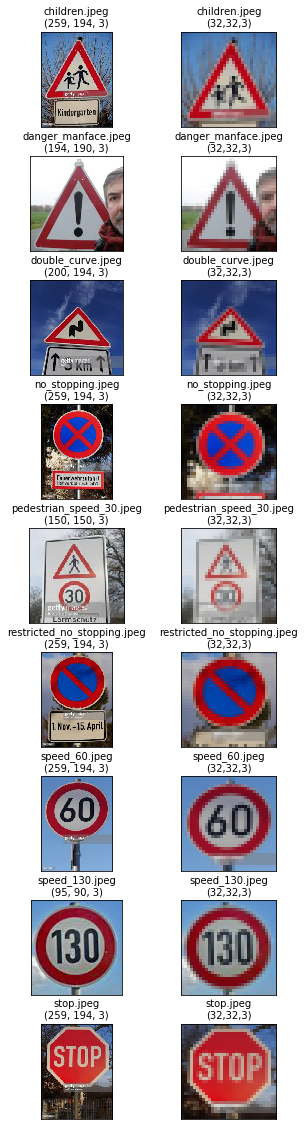

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

signnames_df = pd.read_csv('signnames.csv', index_col=0)
        
web_images_df = pd.read_csv('web_images/web_images.csv', index_col=0)

crop_dict = {'web_images/speed_130.jpeg':(5, 100, 160, 250),
             'web_images/danger_manface.jpeg':(0, 194, 0, 190),
             'web_images/double_curve.jpeg':(0, 200, 0, 194),
             'web_images/pedestrian_speed_30.jpeg':(0, 150, 100, 250)}

web_images = []
plt.close('all')
plt.figure()
fig, axarr = plt.subplots(len(web_images_df), 2, figsize=(5, 20))
fig.subplots_adjust(hspace=0.3)
for i, row in enumerate(web_images_df.itertuples()):
    filename = row.Index
    image = mpimg.imread(filename)
    
    # Crop if necessary
    if filename in crop_dict:
        y0, y1, x0, x1 = crop_dict[filename]
        image = image[y0:y1, x0:x1]
    
    plt.sca(axarr[i,0])
    plt.imshow(image)
    plt.title(os.path.basename(filename) + '\n' + str(image.shape), {'fontsize':10})
    plt.gca().xaxis.set_visible(False)
    plt.gca().yaxis.set_visible(False)
    
    r = 32.0 / image.shape[1]
    dim = (32, int(image.shape[0] * r))
    
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    web_images.append(resized[:32,:32])
    plt.sca(axarr[i,1])
    plt.imshow(web_images[-1])
    plt.title(os.path.basename(filename) + '\n(32,32,3)', {'fontsize':10})
    plt.gca().xaxis.set_visible(False)
    plt.gca().yaxis.set_visible(False)
    
    #plt.gcf().subplots_adjust(wspace=0.5)

X_web = np.array(web_images)
y_web = web_images_df['numeric_label'].values
ytext_web = web_images_df['text_label'].values
web_images_df

fig.savefig('data_visualizations/web_image_resizing.jpg', bbox_inches='tight')

### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, save_path)

    softmax_list = softmax(preprocess(X_web), y_web, k=5)

### Analyze Performance

| isCorrect   | Actual                               | Predicted                    | isIn43Classes   |
|:------------|:-------------------------------------|:-----------------------------|:----------------|
| True        | Children crossing                    | Children crossing            | True            |
| True        | General caution                      | General caution              | True            |
| False       | Double curve                         | Dangerous curve to the right | True            |
| False       | No stopping                          | Stop                         | False           |
| False       | Pedestrians and Speed limit (30km/h) | Priority road                | False           |
| False       | Restricted no stopping               | Speed limit (30km/h)         | False           |
| True        | Speed limit (60km/h)                 | Speed limit (60km/h)         | True            |
| False       | Speed limit (130km/h)                | Speed lim

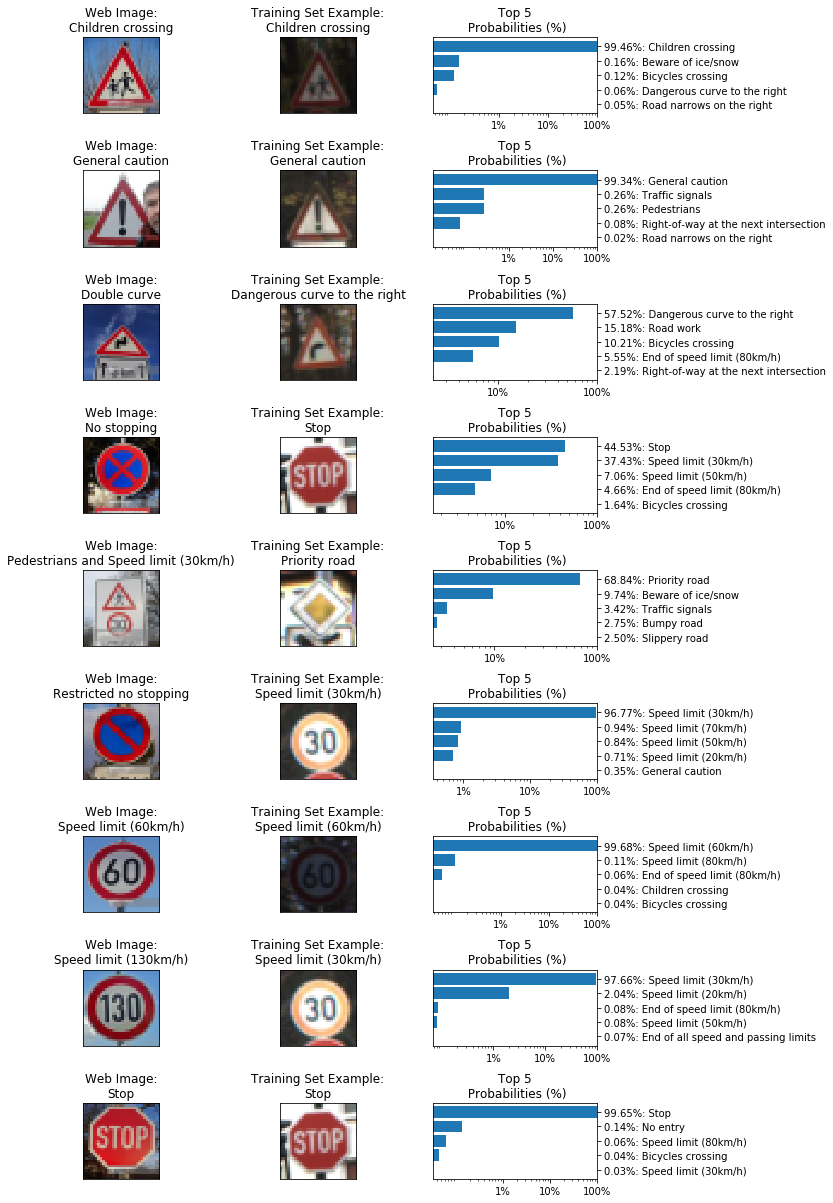

In [14]:
#idx = np.where(y_train==softmax_list.indices[0,0])
ytext_pred = []
plt.close('all')
plt.figure()
fig, axarr = plt.subplots(len(softmax_list.indices), 3, figsize=(10, 21))
fig.subplots_adjust(hspace=0.75)
for idx, (pred_labels, pred_probs) in enumerate(zip(softmax_list.indices, softmax_list.values)):
    
    plt.sca(axarr[idx, 0])
    plt.imshow(X_web[idx])
    plt.title('Web Image:\n' + ytext_web[idx])
    plt.gca().xaxis.set_visible(False)
    plt.gca().yaxis.set_visible(False)
    
    plt.sca(axarr[idx, 1])
    plt.imshow(X_train[np.where(y_train==pred_labels[0])[0][50]])
    pred_text = signnames_df.loc[pred_labels[0], 'SignName']
    plt.title('Training Set Example:\n' + pred_text)
    plt.gca().xaxis.set_visible(False)
    plt.gca().yaxis.set_visible(False)
    
    ax = axarr[idx, 2]
    y_pos = np.arange(len(pred_labels))
    ax.barh(y_pos, pred_probs*100)
    ax.set_yticks(y_pos)
    ylabels = ['{:2.2f}%: {}'.format(p, s) for p,s in
               zip(pred_probs*100, signnames_df.loc[pred_labels, 'SignName'])]
    ax.set_yticklabels(ylabels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.yaxis.tick_right()
    ax.set_xscale('log')
    ax.set_xticks([1,10,100])
    ax.set_xticklabels(['1%','10%','100%'])
    ax.set_xlim([0,100])
    ax.set_title('Top 5\n Probabilities (%)')
    
    ytext_pred.append(pred_text)
    
ytext_pred = np.array(ytext_pred)
print(tabulate({'Actual':ytext_web, 'Predicted': ytext_pred,
                'isCorrect':(ytext_pred==ytext_web).astype(str),
                'isIn43Classes':web_images_df.is_among_43_classes.values.astype(str)},
               headers='keys', tablefmt='pipe'))
fig.savefig('data_visualizations/web_image_top5.jpg', bbox_inches='tight')

In [15]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
total_web_accuracy = np.mean(ytext_pred == ytext_web)
is_seen = web_images_df.is_among_43_classes
total_web_seen_accuracy = np.mean(ytext_pred[is_seen] == ytext_web[is_seen])
print("Total Web Accuracy = {:.3f}, Web Seen Accuracy = {:.3f}".format(total_web_accuracy, total_web_seen_accuracy))

Total Web Accuracy = 0.444, Web Seen Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print('These values are visualized in the code cells above.')
print(softmax_list)

These values are visualized in the code cells above.
TopKV2(values=array([[  9.94631052e-01,   1.56246428e-03,   1.24051969e-03,
          5.61931927e-04,   4.54021443e-04],
       [  9.93435144e-01,   2.63909134e-03,   2.62784236e-03,
          7.62020762e-04,   1.81355965e-04],
       [  5.75245380e-01,   1.51751995e-01,   1.02113567e-01,
          5.55103458e-02,   2.18876339e-02],
       [  4.45279181e-01,   3.74292940e-01,   7.05539882e-02,
          4.65791114e-02,   1.63893737e-02],
       [  6.88352585e-01,   9.74357352e-02,   3.42411064e-02,
          2.75373701e-02,   2.50323080e-02],
       [  9.67671752e-01,   9.36185569e-03,   8.36389326e-03,
          7.06237042e-03,   3.48741724e-03],
       [  9.96762276e-01,   1.09053554e-03,   5.89107105e-04,
          3.85486492e-04,   3.84334446e-04],
       [  9.76554513e-01,   2.04041582e-02,   8.38894455e-04,
          8.31369718e-04,   6.77928736e-04],
       [  9.96515632e-01,   1.37430837e-03,   6.20849489e-04,
          4.433

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 